# Face detection

In [49]:
import cv2

In [2]:
pip install matplotlib


In [3]:
from matplotlib import pyplot as plt

In [4]:
def face_detection_cam():
    # xml file which will help to detection the face
    data="C:\\Users\\Harsh\\Desktop\\Major Project\\haarcascade_frontalface_default.xml"

    #createing haar cascade
    face_cap=cv2.CascadeClassifier(data)
    video_cap=cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret , video_data=video_cap.read()
    
        #this will convert the image into the grayscale means black and white
        col = cv2.cvtColor(video_data,cv2.COLOR_BGR2GRAY)
    
        #detecting face in the image 
        faces=face_cap.detectMultiScale(
            col,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30,30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )
    
        # Draw a rectangle around the faces
        for(x,y,w,h) in faces:
            cv2.rectangle(video_data,(x,y),(x+w,y+h),(0,255,0),2)
    
        # Display the resulting frame
        cv2.imshow('video_live',video_data)
    
        #closing the window
        if cv2.waitKey(1)==ord("a"):
            break

    # when everything is done, release memory and close all the open window like camera        
    video_cap.release()
    cv2.destroyAllWindows()

In [5]:
def face_detection_img(image_pth):
    xml_file="C:\\Users\\Harsh\\Desktop\\Major Project\\haarcascade_frontalface_default.xml"

    faceCascade = cv2.CascadeClassifier(xml_file)

    image=cv2.imread(image_path)

    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    faces=faceCascade.detectMultiScale(
           gray,
           scaleFactor=1.3,
           minNeighbors=5,
           minSize=(30,50),
           flags=cv2.CASCADE_SCALE_IMAGE)

    for(x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),10)
   
    #cv2.imshow("Faces found", image)
    #cv2.waitKey(0)
    
    return image,x,y,w,h

In [6]:
image_path="C:\\Users\\Harsh\\Pictures\\Saved Pictures\\hp.JPG"
img,x,y,w,h=face_detection_img(image_path)

In [7]:
def display(img_,title=''):
    img=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,6))
    ax=plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
    

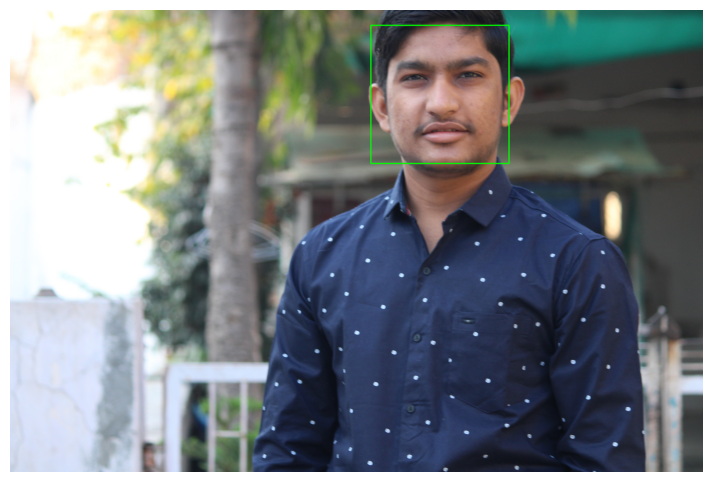

In [8]:
display(img)

In [10]:
rows,cols,_=img.shape

In [11]:
print("rows",rows)
print("cols",cols)
print(x,y,w,h)

rows 4000
cols 6000
3124 132 1196 1196


In [12]:
def cutting_face(img):
    cut_image= img[y:y+h,x:x+w]
    
    return cut_image

In [13]:
f1=cutting_face(img)

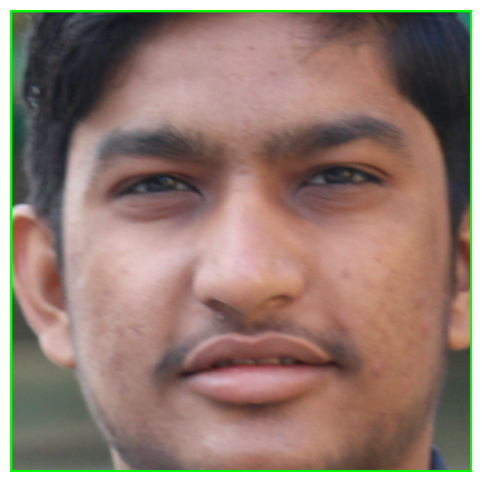

In [14]:
display(f1)

In [46]:
from datetime import datetime
import os

In [47]:
def save_face(f_img):
    t=datetime.now()
    ctime=t.strftime("%H%M%S")
    outfile=ctime+".jpg"
    
    fdir="C:\\Users\\Harsh\\Desktop\\Major Project\\detected_face"

    os.chdir(fdir)

    cv2.imwrite(outfile,f1)

    mdir="C:\\Users\\Harsh\\Desktop\\Major Project"
    os.chdir(mdir)

In [48]:
save_face(f1)

# Facial Feature Extraction